# Assessment 3: WebCrawler and NLP System
#### MA3831 <br> Piper Rains

## TASK 2

### WebScraper Part 1: URL Retreival

Import required libraries

In [84]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Request access to HTML content of page

In [85]:
page = requests.get("https://www.mcgrath.com.au/search#listingresult_mq=Brisbane%20Greater%20Region,%20QLD&listingresult_e=0&listingresult_g=1&listingresult_type=sold&listingresult_surroundingsuburbs=true")
page

<Response [200]>

In [87]:
page.content

b'\r\n\r\n\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!-->\r\n<html class="no-js" lang="en">\r\n<!--<![endif]-->\r\n<head>\r\n<link href="/-/media/feature/experience-accelerator/bootstrap-4/bootstrap-4/styles/optimized-min.css?t=20191127T030522Z" rel="stylesheet" /><link href="/-/media/base-themes/core-libraries/styles/optimized-min.css?t=20191127T030526Z" rel="stylesheet" /><link href="/-/media/base-themes/main-theme/styles/optimized-min.css?t=20191127T030527Z" rel="stylesheet" /><link href="/-/media/themes/mcgrath/website/mcgrath-theme/styles/optimized-min.css?t=20210308T072930Z" rel="stylesheet" />    \r\n    \r\n\r\n\r\n<script type="text/javascript">\r\nvar sdkInstance="appInsightsSDK";window[sdkInstance]="appInsights";var aiName=window[sdkInstance],aisdk=window[aiN

Use BeautifulSoup to parse the HTML content

In [88]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <link href="/-/media/feature/experience-accelerator/bootstrap-4/bootstrap-4/styles/optimized-min.css?t=20191127T030522Z" rel="stylesheet"/>
  <link href="/-/media/base-themes/core-libraries/styles/optimized-min.css?t=20191127T030526Z" rel="stylesheet"/>
  <link href="/-/media/base-themes/main-theme/styles/optimized-min.css?t=20191127T030527Z" rel="stylesheet"/>
  <link href="/-/media/themes/mcgrath/website/mcgrath-theme/styles/optimized-min.css?t=20210308T072930Z" rel="stylesheet"/>
  <script type="text/javascript">
   var sdkInstance="appInsightsSDK";window[sdkInstance]="appInsights";var aiName=window[sdkInstance],aisdk=window[aiName]||function(e){function n(e){t[e]=function(){va

Initialise empty list to store scraped URLs in

In [89]:
urls = []
head_link = "https://www.mcgrath.com.au/"

Retrieve a subsection of the HTML content to refine search area for URL scraping. <br>
Retrieve tags for each house container.

In [90]:
listings = soup.find('div', {'class': 'component search-results container horizontal search-property-listings__wrapper agent-property-listings container mt-4'})
house_containers = listings.find_all('div', {"class": "container"})

Loop through each house container and extract URL for that container, and store it in urls list

In [91]:
if house_containers != []:
    
    for container in house_containers:
        
        for a in container.find_all('a', href=True, text=True):
            urls.append(head_link + a['href'])


In [92]:
len(urls)

0

In [93]:
listings

<div class="component search-results container horizontal search-property-listings__wrapper agent-property-listings container mt-4" data-class-variant="container horizontal search-property-listings__wrapper" data-properties='{"endpoint":"//sxa/search/results/","v":"{575FDB9B-E3D7-4346-B895-A4CD1EE5A575}","s":"{B46C3E5F-0CDB-4498-9B44-02BD3F7BDC8E}","l":"","p":12,"defaultSortOrder":"SortByPrice,Ascending","sig":"listingresult","itemid":"{AB79FC9B-E66B-4345-95E9-23E854CC5089}","autoFireSearch":false}'>
<div class="component-content">
<div class="no-results" style="display: none">
                Thanks for searching. We do not currently have any property listings in your search area. Please search again or contact us.
                
            </div>
<div class="progress"></div>
</div>
</div>

For some unknown reason, the HTML content of the website has no record of the house containers, displaying the message "Thanks for searching. We do not currently have any property listings in your search area. Please search again or contact us". Thus it is not possible to retrieve any URLs.

Instead, URLs from the first two pages of property listings from the initial website were hand-gathered and inserted into the urls list.

In [94]:
urls = ['https://www.mcgrath.com.au/85a-alice-street-goodna-qld-4300-for-sale-409477',
       'https://www.mcgrath.com.au/8-112-school-road-yeronga-qld-4104-for-sale-459542',
       'https://www.mcgrath.com.au/901-160-roma-street-brisbane-city-qld-4000-for-sale-407985',
       'https://www.mcgrath.com.au/24-bruce-road-woodridge-qld-4114-for-sale-445152',
       'https://www.mcgrath.com.au/11-454-upper-edward-street-spring-hill-qld-4000-for-sale-411622',
       'https://www.mcgrath.com.au/809-8-jeays-street-bowen-hills-qld-4006-for-sale-464567',
       'https://www.mcgrath.com.au/9-115-park-road-yeronga-qld-4104-for-sale-432277',
       'https://www.mcgrath.com.au/6-27-ballow-street-fortitude-valley-qld-4006-for-sale-400266',
       'https://www.mcgrath.com.au/4-83-linton-street-kangaroo-point-qld-4169-for-sale-401779',
       'https://www.mcgrath.com.au/3-11-yeronga-street-yeronga-qld-4104-for-sale-415297',
       'https://www.mcgrath.com.au/5-18-salt-street-windsor-qld-4030-for-sale-445923',
       'https://www.mcgrath.com.au/1909-35-campbell-street-bowen-hills-qld-4006-for-sale-460666',
       'https://www.mcgrath.com.au/1-299-bowen-terrace-new-farm-qld-4005-for-sale-452640',
       'https://www.mcgrath.com.au/65-131-rockfield-road-doolandella-qld-4077-for-sale-474773',
       'https://www.mcgrath.com.au/85-alice-street-goodna-qld-4300-for-sale-409476',
       'https://www.mcgrath.com.au/3-22-taunton-street-annerley-qld-4103-for-sale-414520',
       'https://www.mcgrath.com.au/2-49-wilton-terrace-yeronga-qld-4104-for-sale-469762',
       'https://www.mcgrath.com.au/7-woburn-street-woodridge-qld-4114-for-sale-401664',
       'https://www.mcgrath.com.au/6-sarah-court-everton-park-qld-4053-for-sale-403456',
       'https://www.mcgrath.com.au/1-49-wilton-terrace-yeronga-qld-4104-for-sale-407076',
       'https://www.mcgrath.com.au/3-93-waminda-street-morningside-qld-4170-for-sale-432190',
       'https://www.mcgrath.com.au/206-44-ferry-street-kangaroo-point-qld-4169-for-sale-419522',
       'https://www.mcgrath.com.au/3-346-zillmere-road-zillmere-qld-4034-for-sale-475357',
       'https://www.mcgrath.com.au/5-22-balowrie-street-hamilton-qld-4007-for-sale-402926']

In [95]:
len(urls)

24

### WebScraper Part 2: URL Property Content Extraction

Initialise a list for each field of content to be extracted from a property listing.

In [96]:
property_type = []
street_number = []
street_address = []
suburb = []
state = []
price = []
description = []

Loop through each URL previously attained in the urls list, accessing the correct tag and text to extract desired property information and append it to the corresponding list.

In [97]:
for url in urls:
    
    page = requests.get(url)
    
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, 'html.parser')
        
        
        # property type
        property_type_html = soup.find('li', {'class':'breadcrumb-item breadcrumb-property-type'})
        property_type.append(property_type_html.text)

        
        # street number
        street_number_html = soup.find('span', {'class': 'field-streetnumber'})
        street_number.append(street_number_html.text)
        
        
        # street address
        street_address_html = soup.find('span', {'class': 'field-street'})
        street_address.append(street_address_html.text)
        
        
        # suburb
        suburb_html = soup.find('span', {'class': 'field-suburb'})
        suburb.append(suburb_html.text)
        
        
        # state
        state_html = soup.find('span', {'class': 'field-state'})
        state.append(state_html.text)
        
        
        # price
        price_html = soup.find('span', {'class': 'field-displayprice property-information__price field-displayprice'})
        price.append(price_html.text)
        
        
        # description
        description_html = soup.find('p', {'class': 'property-information__summary field-description'})
        description.append(description_html.text)

Create a pandas data frame of all the scraped data.

In [98]:
cols = ['property_type', 'street_number', 'street_address', 'suburb', 'state', 'price', 'description', 'url']

properties = pd.DataFrame({'property_type': property_type, 'street_number': street_number, 'street_address':
                          street_address, 'suburb': suburb, 'state': state, 'price': price, 'description': description,
                           'url': urls})[cols]

In [99]:
properties

,property_type,street_number,street_address,suburb,state,price,description,url
0,\nLand\n,85A,Alice Street,Goodna,QLD,"Sold $170,000",Versatile large flat block medium density zone...,https://www.mcgrath.com.au/85a-alice-street-go...
1,\nUnit\n,8/112,School Road,Yeronga,QLD,"Sold $210,000",Cavity brick 2 bedroom unit in a small block o...,https://www.mcgrath.com.au/8-112-school-road-y...
2,\nApartment\n,901/160,Roma Street,Brisbane City,QLD,"Sold $210,000",This executive one bedroom has recently been r...,https://www.mcgrath.com.au/901-160-roma-street...
3,\nHouse\n,24,Bruce Road,Woodridge,QLD,Under Contract,"Ideal for a seasoned renovator, this solid bri...",https://www.mcgrath.com.au/24-bruce-road-woodr...
4,\nApartment\n,11/454,Upper Edward Street,Spring Hill,QLD,"Sold $230,000",All offer to be presented. Act now to secure y...,https://www.mcgrath.com.au/11-454-upper-edward...
5,\nApartment\n,809/8,Jeays Street,Bowen Hills,QLD,"Sold $240,000","Convenient to the CBD, this furnished apartmen...",https://www.mcgrath.com.au/809-8-jeays-street-...
6,\nUnit\n,9/115,Park Road,Yeronga,QLD,"Sold $240,000","Located in an elevated quiet location, only 7k...",https://www.mcgrath.com.au/9-115-park-road-yer...
7,\nApartment\n,6/27,Ballow Street,Fortitude Valley,QLD,Sold Undisclosed,Presenting an outstanding investment opportuni...,https://www.mcgrath.com.au/6-27-ballow-street-...
8,\nApartment\n,4/83,Linton Street,Kangaroo Point,QLD,"Sold $265,000",This second floor apartment provides a great o...,https://www.mcgrath.com.au/4-83-linton-street-...
9,\nUnit\n,3/11,Yeronga Street,Yeronga,QLD,"Sold $275,000",Ticking all the boxes for a well built and mai...,https://www.mcgrath.com.au/3-11-yeronga-street...


Remove/replace unneccesary punctuation from the data frame.

In [100]:
properties = properties.replace('\n','', regex=True)
properties = properties.replace('-','.', regex=True)

In [101]:
properties

,property_type,street_number,street_address,suburb,state,price,description,url
0,Land,85A,Alice Street,Goodna,QLD,"Sold $170,000",Versatile large flat block medium density zone...,https://www.mcgrath.com.au/85a.alice.street.go...
1,Unit,8/112,School Road,Yeronga,QLD,"Sold $210,000",Cavity brick 2 bedroom unit in a small block o...,https://www.mcgrath.com.au/8.112.school.road.y...
2,Apartment,901/160,Roma Street,Brisbane City,QLD,"Sold $210,000",This executive one bedroom has recently been r...,https://www.mcgrath.com.au/901.160.roma.street...
3,House,24,Bruce Road,Woodridge,QLD,Under Contract,"Ideal for a seasoned renovator, this solid bri...",https://www.mcgrath.com.au/24.bruce.road.woodr...
4,Apartment,11/454,Upper Edward Street,Spring Hill,QLD,"Sold $230,000",All offer to be presented. Act now to secure y...,https://www.mcgrath.com.au/11.454.upper.edward...
5,Apartment,809/8,Jeays Street,Bowen Hills,QLD,"Sold $240,000","Convenient to the CBD, this furnished apartmen...",https://www.mcgrath.com.au/809.8.jeays.street....
6,Unit,9/115,Park Road,Yeronga,QLD,"Sold $240,000","Located in an elevated quiet location, only 7k...",https://www.mcgrath.com.au/9.115.park.road.yer...
7,Apartment,6/27,Ballow Street,Fortitude Valley,QLD,Sold Undisclosed,Presenting an outstanding investment opportuni...,https://www.mcgrath.com.au/6.27.ballow.street....
8,Apartment,4/83,Linton Street,Kangaroo Point,QLD,"Sold $265,000",This second floor apartment provides a great o...,https://www.mcgrath.com.au/4.83.linton.street....
9,Unit,3/11,Yeronga Street,Yeronga,QLD,"Sold $275,000",Ticking all the boxes for a well built and mai...,https://www.mcgrath.com.au/3.11.yeronga.street...


Save and export scraped data to a CSV file

In [104]:
properties.to_csv("properties_dataset_raw.csv", index = False)

Review data frame dimensions.

In [105]:
shape = properties.shape
print("The shape of the properties dataset is: " + str(shape))

The shape of the properties dataset is: (24, 8)


Calculate the average number of words for the property descriptions.

In [106]:
total = 0
word_lengths = []

for desc in properties['description']:
    total += len(desc.split())
    word_lengths.append(len(desc.split()))
    
avg_words = total/len(properties['description'])

print("The average words per property description are: " + str(round(avg_words,2)))

The average words per property description are: 131.08


Using MatplotLib, generate a histogram to display the distribution of word totals for property descriptions.

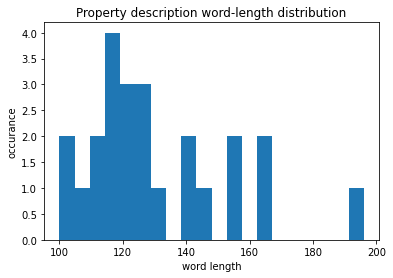

In [107]:
import matplotlib.pyplot as plt

plt.hist(word_lengths, bins = 20)
plt.title('Property description word-length distribution')
plt.xlabel('word length')
plt.ylabel('occurance')
plt.show()

Calculate how many unique property types exist in the data frame.

In [108]:
print("Total number of unique property types are: " + str(len(properties['property_type'].unique())))

Total number of unique property types are: 5


## TASK 3

### NLP Task 1: Sentiment Analysis

Import required libraries. Vader and its lexicon will be used to perform sentiment analysis on property descriptions.

In [120]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Piper
[nltk_data]     Rains\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Create a sentiment analyser, sid, and apply it to every entry of property description data using the apply command.

In [110]:
sid = SentimentIntensityAnalyzer()

description_sent_ = properties.apply(lambda r: sid.polarity_scores(r.description), axis=1)

Add the sentiment results to the original properties data frame.

In [111]:
df = pd.DataFrame(list(description_sent))
properties = properties.join(df)

In [112]:
properties

,property_type,street_number,street_address,suburb,state,price,description,url,neg,neu,pos,compound
0,Land,85A,Alice Street,Goodna,QLD,"Sold $170,000",Versatile large flat block medium density zone...,https://www.mcgrath.com.au/85a.alice.street.go...,0.040,0.819,0.141,0.9001
1,Unit,8/112,School Road,Yeronga,QLD,"Sold $210,000",Cavity brick 2 bedroom unit in a small block o...,https://www.mcgrath.com.au/8.112.school.road.y...,0.048,0.782,0.169,0.9618
2,Apartment,901/160,Roma Street,Brisbane City,QLD,"Sold $210,000",This executive one bedroom has recently been r...,https://www.mcgrath.com.au/901.160.roma.street...,0.000,1.000,0.000,0.0000
3,House,24,Bruce Road,Woodridge,QLD,Under Contract,"Ideal for a seasoned renovator, this solid bri...",https://www.mcgrath.com.au/24.bruce.road.woodr...,0.020,0.730,0.250,0.9830
4,Apartment,11/454,Upper Edward Street,Spring Hill,QLD,"Sold $230,000",All offer to be presented. Act now to secure y...,https://www.mcgrath.com.au/11.454.upper.edward...,0.000,0.802,0.198,0.9913
5,Apartment,809/8,Jeays Street,Bowen Hills,QLD,"Sold $240,000","Convenient to the CBD, this furnished apartmen...",https://www.mcgrath.com.au/809.8.jeays.street....,0.000,0.792,0.208,0.9769
6,Unit,9/115,Park Road,Yeronga,QLD,"Sold $240,000","Located in an elevated quiet location, only 7k...",https://www.mcgrath.com.au/9.115.park.road.yer...,0.000,0.882,0.118,0.9485
7,Apartment,6/27,Ballow Street,Fortitude Valley,QLD,Sold Undisclosed,Presenting an outstanding investment opportuni...,https://www.mcgrath.com.au/6.27.ballow.street....,0.000,0.755,0.245,0.9865
8,Apartment,4/83,Linton Street,Kangaroo Point,QLD,"Sold $265,000",This second floor apartment provides a great o...,https://www.mcgrath.com.au/4.83.linton.street....,0.000,0.687,0.313,0.9924
9,Unit,3/11,Yeronga Street,Yeronga,QLD,"Sold $275,000",Ticking all the boxes for a well built and mai...,https://www.mcgrath.com.au/3.11.yeronga.street...,0.000,0.783,0.217,0.9878


Calculate the average sentiment score across the data frame.

In [113]:
total = 0

for score in properties['compound']:
    total += score
    
avg_score = total/len(properties['compound'])

print("The average sentiment score for properties is: " + str(round(avg_score,3)))

The average sentiment score for properties is: 0.927


In retrospect, data supplementation could be implemented (and sites found) to supply data on previous property owner/inpspection reviews, which would provide a better sentiment analysis output. Real estate agents are likely to make positive descriptions of properties to sell them, thus resulting in a high sentiment score.

### NLP Task 2: Text Summarisation

Import the required libraries.

In [114]:
import heapq
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Piper
[nltk_data]     Rains\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Piper
[nltk_data]     Rains\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Assign a term weight value to each word in a sentence, and then assign an overall sentence weight value to each sentence. The two sentences with the highest sentence weight score are selected as the summary sentences.

In [115]:
# initialise a list to store description summaries
summary = []
# initialise stop words
stopwords = nltk.corpus.stopwords.words('english')


# loop through each description in the property data frame
for desc in properties['description']:
    
    # tokenise each description into sentences
    sentence_list = nltk.sent_tokenize(desc)
    # initialise a dictionary to store word frequencies
    word_frequencies = {}
    
    # Loop through all words in a description
    for word in nltk.word_tokenize(desc):
      
        # if statement to ignore stop words and add words & frequency tally to word_frequencies dictionary
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    
    # Calculate the weighted frequency of each word
    maximum_frequncy = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
    
    sentence_scores = {}
    
    # Calculate scores for each sentence by adding weighted frequencies of the words in the specific sentence
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
    
    # Select only the top two highest weighted sentences
    summary_sentences = heapq.nlargest(2, sentence_scores, key=sentence_scores.get)
    # Append these sentences to summary list
    summary.append(summary_sentences)


In [116]:
len(summary)

24

Add the summary results to the properties data frame.

In [117]:
properties['summary'] = summary

In [118]:
properties

,property_type,street_number,street_address,suburb,state,price,description,url,neg,neu,pos,compound,summary
0,Land,85A,Alice Street,Goodna,QLD,"Sold $170,000",Versatile large flat block medium density zone...,https://www.mcgrath.com.au/85a.alice.street.go...,0.040,0.819,0.141,0.9001,[It's also well positioned for easy access to ...
1,Unit,8/112,School Road,Yeronga,QLD,"Sold $210,000",Cavity brick 2 bedroom unit in a small block o...,https://www.mcgrath.com.au/8.112.school.road.y...,0.048,0.782,0.169,0.9618,[Conveniently located across from Yeronga Prim...
2,Apartment,901/160,Roma Street,Brisbane City,QLD,"Sold $210,000",This executive one bedroom has recently been r...,https://www.mcgrath.com.au/901.160.roma.street...,0.000,1.000,0.000,0.0000,[This executive one bedroom has recently been ...
3,House,24,Bruce Road,Woodridge,QLD,Under Contract,"Ideal for a seasoned renovator, this solid bri...",https://www.mcgrath.com.au/24.bruce.road.woodr...,0.020,0.730,0.250,0.9830,"[Ideal for a seasoned renovator, this solid br..."
4,Apartment,11/454,Upper Edward Street,Spring Hill,QLD,"Sold $230,000",All offer to be presented. Act now to secure y...,https://www.mcgrath.com.au/11.454.upper.edward...,0.000,0.802,0.198,0.9913,"[Capturing city views, this spacious Spring Hi..."
5,Apartment,809/8,Jeays Street,Bowen Hills,QLD,"Sold $240,000","Convenient to the CBD, this furnished apartmen...",https://www.mcgrath.com.au/809.8.jeays.street....,0.000,0.792,0.208,0.9769,"[Swimming pool, gymnasium, theatre, secure car..."
6,Unit,9/115,Park Road,Yeronga,QLD,"Sold $240,000","Located in an elevated quiet location, only 7k...",https://www.mcgrath.com.au/9.115.park.road.yer...,0.000,0.882,0.118,0.9485,[From the private balcony you get uninterrupte...
7,Apartment,6/27,Ballow Street,Fortitude Valley,QLD,Sold Undisclosed,Presenting an outstanding investment opportuni...,https://www.mcgrath.com.au/6.27.ballow.street....,0.000,0.755,0.245,0.9865,[Presenting an outstanding investment opportun...
8,Apartment,4/83,Linton Street,Kangaroo Point,QLD,"Sold $265,000",This second floor apartment provides a great o...,https://www.mcgrath.com.au/4.83.linton.street....,0.000,0.687,0.313,0.9924,[This second floor apartment provides a great ...
9,Unit,3/11,Yeronga Street,Yeronga,QLD,"Sold $275,000",Ticking all the boxes for a well built and mai...,https://www.mcgrath.com.au/3.11.yeronga.street...,0.000,0.783,0.217,0.9878,[Ticking all the boxes for a well built and ma...


Save and export the new analysed data frame to a CSV file.

In [119]:
properties.to_csv("properties_dataset_complete.csv", index = False)